In [1]:
from EQL.model import EQL
EQLmodel = EQL(num_layers = 1)
EQLmodel.build_and_compile_model()

# Generating Data, Simple Sine

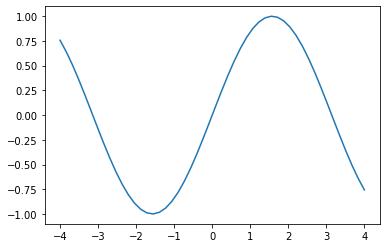

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4,4)
y = np.sin(x)
plt.plot(x, y)

# Check proper behavior for ground truth weights

In [61]:
EQLmodel.get_weights(2)

[array([[ 0.03142048],
        [-0.05374764],
        [ 0.01426858],
        [ 0.09591132],
        [ 0.0152718 ]], dtype=float32), array([-0.08834924], dtype=float32)]

In [49]:
#Generating proper weights
w1 = EQLmodel.model.layers[1].get_weights()
w1[0] = np.array([[0, 1, 0, 0, 0, 0]])
w1[1] = np.array([0,0,0,0,0,0])

w2 = EQLmodel.model.layers[2].get_weights()
w2[0] = np.array([[0],[1],[0],[0],[0]])
w2[1] = np.array([0])

In [50]:
#Setting weights
EQLmodel.set_weights(1, w1)    
EQLmodel.set_weights(2, w2)    

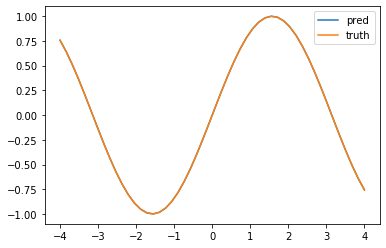

In [51]:
#Visualizing
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Does indeed work as expected!

# Training and Testing

In [96]:
tf.keras.backend.clear_session()
EQLmodel.build_and_compile_model() #Recompiling models to reset weights
EQLmodel.get_weights(1)

[array([[ 0.06272415,  0.03217024,  0.02024911,  0.0879875 ,  0.05027946,
         -0.05530402]], dtype=float32),
 array([ 0.12010524,  0.01745843, -0.01926479,  0.00640066, -0.06506202,
         0.00367148], dtype=float32)]

In [97]:
EQLmodel.fit(x, y, 0.1, t0 = 6000, t1 = 2000, t2 = 2000, atol = 0.001)
EQLmodel.summary()

Model: "functional_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
eql_layer_42 (EqlLayer)      (None, 5)                 12        
_________________________________________________________________
dense_layer_42 (DenseLayer)  (None, 1)                 6         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


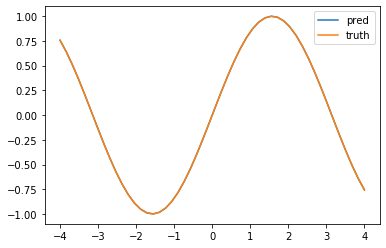

In [98]:
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Extrapolation:

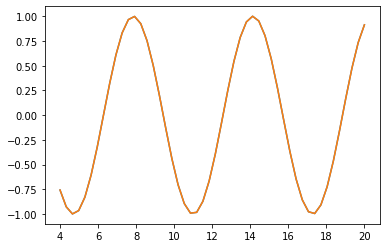

2/2 [==============================] - 0s 4ms/step - loss: 5.6443e-14


5.644329066092045e-14

In [99]:
x_test=np.linspace(4,20)
y_test=np.sin(x_test)
y_pred = EQLmodel.predict(x_test)
plt.plot(x_test, y_pred)
plt.plot(x_test, y_test)
plt.show()
EQLmodel.evaluate(x_test,y_test)

In [100]:
EQLmodel.get_weights(1) #Same weights as ground truth!

[array([[0., 1., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [101]:
EQLmodel.get_weights(2) #Same weights as ground truth!

[array([[0.],
        [1.],
        [0.],
        [0.],
        [0.]], dtype=float32), array([0.], dtype=float32)]

In [102]:
EQLmodel.model.layers[1].mask

ListWrapper([ListWrapper([array([[0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])]), array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])])

### We see that we are able to learn the sin(x) function perfectly with proper regularization and sufficient epochs for each phase as demonstrated in the paper! Lets move on to a more complex learning task:

# Sum of Sines

## Check behavior for ground truth weights/biases

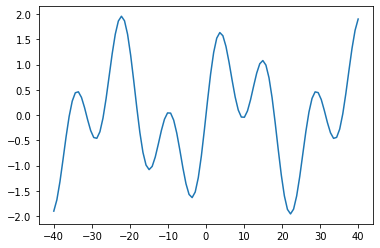

In [166]:
x = np.linspace(-40,40, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
plt.plot(x, y)

In [167]:
EQLmodel = EQL(num_layers = 2, v = [2, 1])
EQLmodel.build_and_compile_model()

In [172]:
#True weights and biases
w1 = [np.array([[0,  0.2        ,  0.        ,  0.        ,  0,
          0,  0.        , 0.5 ,  0.        ,  0.        ,
          0.        ,  0.        ]]),
 np.array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       , 0,  0.       ,  0.       ,
         0.       ,  0.       ])]
w2 = [np.array([[ 0.0000000e+00, 0,  0,  0.0000000e+00,
          0,  0],
        [ 1,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0],
        [ 0.0000000e+00, 0,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0,  0,  0.0000000e+00,
         0,  0],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 1.0000000e+00, 0,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0, 0,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00]]),
 np.array([ 0.        , 0,  0.        ,  0.        ,  0.        ,
         0.        ])]
w3 = [np.array([[1],
        [0 ],
        [0 ],
        [0        ],
        [0]]), np.array([0])]

In [173]:
EQLmodel.set_weights(1, w1)    
EQLmodel.set_weights(2, w2)  
EQLmodel.set_weights(3, w3)

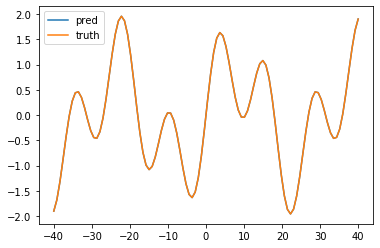

In [171]:
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Works as expected

## Training and Testing

In [185]:
EQLmodel = EQL(num_layers = 2, v = [2, 1])
EQLmodel.build_and_compile_model()

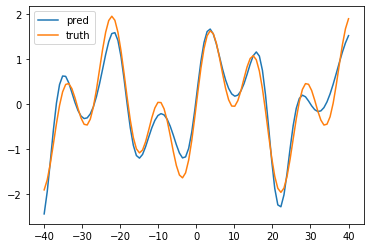

In [186]:
x = np.linspace(-40,40, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
EQLmodel.fit(x, y, 0.1, t0 = 4000, t1 = 500, t2 = 250, atol = 0.001)
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Extrapolation

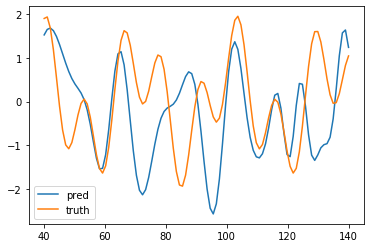

In [187]:
x = np.linspace(40,140, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

In [188]:
EQLmodel.get_weights(1)

[array([[ 0.26481462,  0.        ,  0.14081378,  0.        , -0.12224078,
         -0.0520354 ,  0.        ,  0.17365156,  0.        ,  0.        ,
          0.        ,  0.        ]], dtype=float32),
 array([0.       , 0.       , 1.3383268, 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ],
       dtype=float32)]

In [189]:
EQLmodel.get_weights(2)

[array([[ 0.        ,  0.15463923, -0.13963044,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  2.052418  ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.06283094, -0.08821376,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , -1.4000676 ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        , -0.20088595,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]], dtype=float32),
 array([ 0.  

#### We see that, while the weights have quite a sparse distribution, it is not the true solution, we can remedy this by taking into account extra information and getting rid of activations we know we will not need, i.e anything other then "sine" and "id" activation.

In [319]:
tf.keras.backend.clear_session()
EQLmodel = EQL(num_layers = 2, v = [2, 1])
EQLmodel.build_and_compile_model(exclude = [['id','cos', 'mult', 'sig'],['sin','cos','mult','sig']])
EQLmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
eql_layer (EqlLayer)         (None, 2)                 4         
_________________________________________________________________
eql_layer_1 (EqlLayer)       (None, 1)                 3         
_________________________________________________________________
dense_layer (DenseLayer)     (None, 1)                 2         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


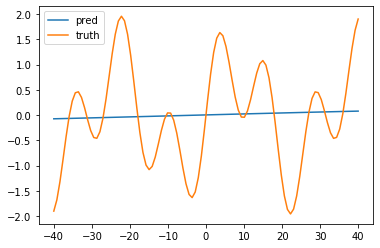

In [320]:
x = np.linspace(-40,40, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
EQLmodel.fit(x, y, 0, t0 = 5500, t1 = 0, t2 = 0, atol = 0.001)
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Extrapolation:

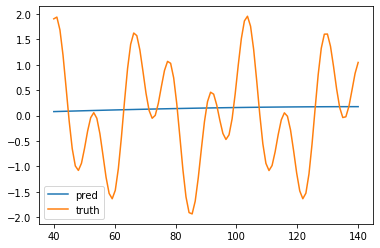

In [321]:
x = np.linspace(40,140, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

In [322]:
EQLmodel.get_weights(1)

[array([[0.01067715, 0.01081264]], dtype=float32),
 array([0.08649179, 0.0279069 ], dtype=float32)]

In [323]:
EQLmodel.get_weights(2)

[array([[0.4178245 ],
        [0.37092716]], dtype=float32), array([-0.0490641], dtype=float32)]

In [324]:
EQLmodel.get_weights(3)

[array([[0.23207873]], dtype=float32), array([0.00401512], dtype=float32)]

### This helps focus our model more and adheres to occams razor principle of making the model as simple as possible, but there is still an issue, our weight initialization. We need proper weight initialization to converge to the true solution in this case since there are several local optima when it comes to the frequency of a signal. If we set the starting weights to some value close to the true value, our model is able to converge to the true solution much more easily:

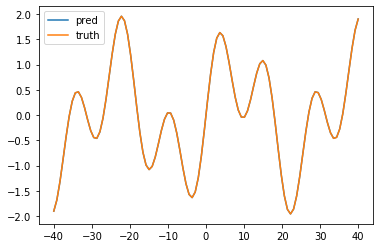

In [330]:
tf.keras.backend.clear_session()
EQLmodel = EQL(num_layers = 2, v = [2, 1])
EQLmodel.build_and_compile_model(exclude = [['id','cos', 'mult', 'sig'],['sin','cos','mult','sig']])

w1 = [np.array([[0.4,  0.1]]),
 np.array([0,  0])]
w2 = [np.array([[ 0.8 ],
        [1.2]]), np.array([0])]
w3 = [np.array([[0.9]]), np.array([0])]
EQLmodel.set_weights(1, w1)
EQLmodel.set_weights(2, w2)
EQLmodel.set_weights(3, w3)

x = np.linspace(-40,40, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
EQLmodel.fit(x, y, 0.1, t0 = 10000, t1 = 0, t2 = 0, atol = 0.001)
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

### Extrapolation:

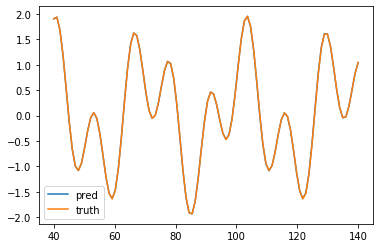

In [334]:
x = np.linspace(40,140, 100)
y = np.sin(0.2*x) + np.sin(0.5*x)
y_pred = EQLmodel.predict(x)
plt.plot(x, y_pred)
plt.plot(x, y)
plt.legend(['pred','truth'])
plt.show()

In [331]:
EQLmodel.get_weights(1)

[array([[0.50008076, 0.20007879]], dtype=float32),
 array([-0.0004313 , -0.00032714], dtype=float32)]

In [332]:
EQLmodel.get_weights(2)

[array([[1.065148 ],
        [1.0649333]], dtype=float32), array([-0.00205162], dtype=float32)]

In [333]:
EQLmodel.get_weights(3)

[array([[0.93892324]], dtype=float32), array([0.00161382], dtype=float32)]

### Our model fit the exact solution and extrapolates perfectly even for a task like a sum of sines, as presented in the paper. For more information on the model and other functions that this model is tested on please read the original paper linked in the README.md file on pip or github!